In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline


import lightgbm as lgb
import sklearn

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import xgboost as xgb

from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.utils import shuffle
from scipy.stats import mode
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


import warnings

Using TensorFlow backend.


In [2]:
#data = pd.read_csv('D:/FV_raw/S01_total_rev.csv')
data = pd.read_csv('C:\\Users\\\koreaw\\비즈니스어낼리틱스\\BA_data\\S01_data_rev_1.csv')
print(data.shape)

(53692, 94)


In [3]:
var = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
target = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(var)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.085121,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.099081,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.115764,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.090398,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.009193,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9


In [4]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)
data2_norm2 = pd.DataFrame(new_data2)
data_norm = data2_norm2.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9


## Class 7개, 최종 데이터 셋

In [5]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,17.0
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,21.0
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,9.0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,21.0
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,9.0


### 9 vs all

In [6]:
def func(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func, axis = 1)

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
data_norm1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,1
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,1
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,1
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,0


In [8]:
X= data_norm1.drop(['Class','ClassA'], axis=1)
y= data_norm1['ClassA']

train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)


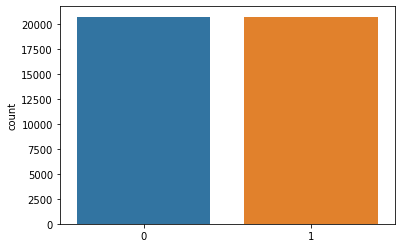

In [9]:
smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

In [10]:
x_test=x_test.values
y_test=y_test.values

In [11]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
# names = ["SVM", "Random Forest", "Neural Net", "AdaBoost",
#          "Logistic Regression", "XGBoost"]
names = ["SVM", "Random Forest", "XGBoost", "Neural Net", "AdaBoost"]
# classifiers = [
#     svm.SVC(gamma = 'scale'),
#     RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0),
#     MLPClassifier(max_iter=10000, 
#                       verbose=True, 
#                       hidden_layer_sizes=(300,100), 
#                       activation = 'relu',
#                       alpha = 1e-5,
#                       beta_1=0.9,
#                       beta_2=0.999,
#                       power_t = 0.5),
#     AdaBoostClassifier(base_estimator=None,
#                               learning_rate=1.0,
#                               n_estimators=100),
    
#     LogisticRegression(solver='liblinear'),
    
#     xgb.XGBClassifier(objective="binary:logistic", n_estimators=500 , random_state=42, eval_metric="auc")
#     ]#,
#     #GaussianProcessClassifier(1.0 * RBF(1.0))]    
classifiers = [
    svm.SVC(gamma = 'scale'),
    RandomForestClassifier(n_estimators=300, max_depth=30, random_state =0),
    xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5),  
        MLPClassifier(max_iter=10000, 
                      verbose=True, 
                      hidden_layer_sizes=(300,100), 
                      activation = 'relu',
                      alpha = 1e-5,
                      beta_1=0.9,
                      beta_2=0.999,
                      power_t = 0.5),    
    AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100),
    
#     LogisticRegression(solver='liblinear'),
    
  
    ]#,
    #GaussianProcessClassifier(1.0 * RBF(1.0))]

In [13]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.7817610744070184
Random Forest 0.7869944852941178
XGBoost 0.7833461835003854
Iteration 1, loss = 0.41276694
Iteration 2, loss = 0.34010658
Iteration 3, loss = 0.32702912
Iteration 4, loss = 0.31572790
Iteration 5, loss = 0.31029455
Iteration 6, loss = 0.30589695
Iteration 7, loss = 0.30069910
Iteration 8, loss = 0.29613148
Iteration 9, loss = 0.29252204
Iteration 10, loss = 0.28905531
Iteration 11, loss = 0.28729478
Iteration 12, loss = 0.28473231
Iteration 13, loss = 0.28024675
Iteration 14, loss = 0.27900603
Iteration 15, loss = 0.27491368
Iteration 16, loss = 0.27379682
Iteration 17, loss = 0.27209307
Iteration 18, loss = 0.27007720
Iteration 19, loss = 0.26864933
Iteration 20, loss = 0.26623650
Iteration 21, loss = 0.26457407
Iteration 22, loss = 0.26310284
Iteration 23, loss = 0.26124196
Iteration 24, loss = 0.25807605
Iteration 25, loss = 0.25843126
Iteration 26, loss = 0.25688758
Iteration 27, loss = 0.25297095
Iteration 28, loss = 0.25146208
Iteration 29, loss = 0.2496512

In [14]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8842
           1       0.77      0.81      0.79      4355

    accuracy                           0.86     13197
   macro avg       0.84      0.84      0.84     13197
weighted avg       0.86      0.86      0.86     13197



In [15]:
data_norm2 = data_norm1[data_norm1['ClassA']==1]

def func(data_norm2) :
    if data_norm2['Class'] == 21 : return 0
    else : return 1
data_norm2['ClassA'] = data_norm2.apply(func, axis = 1)

train, test = train_test_split(data_norm2, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)


# sns.countplot(y_train_sm)
# plt.show()

x_test=x_test.values
y_test=y_test.values

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.9072258259164279
Random Forest 0.9191004672897198
XGBoost 0.9069560047562427
Iteration 1, loss = 0.50888236
Iteration 2, loss = 0.40974296
Iteration 3, loss = 0.37880287
Iteration 4, loss = 0.35871353
Iteration 5, loss = 0.34196902
Iteration 6, loss = 0.33075718
Iteration 7, loss = 0.31979389
Iteration 8, loss = 0.31337671
Iteration 9, loss = 0.30592332
Iteration 10, loss = 0.29749446
Iteration 11, loss = 0.29325908
Iteration 12, loss = 0.28967615
Iteration 13, loss = 0.28188625
Iteration 14, loss = 0.27431837
Iteration 15, loss = 0.27212941
Iteration 16, loss = 0.26917888
Iteration 17, loss = 0.26229894
Iteration 18, loss = 0.25647215
Iteration 19, loss = 0.25310332
Iteration 20, loss = 0.24609813
Iteration 21, loss = 0.24329989
Iteration 22, loss = 0.23664339
Iteration 23, loss = 0.23326212
Iteration 24, loss = 0.22963606
Iteration 25, loss = 0.22507686
Iteration 26, loss = 0.22317845
Iteration 27, loss = 0.21647671
Iteration 28, loss = 0.21131838
Iteration 29, loss = 0.2089658

In [17]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       930
           1       0.92      0.92      0.92      3396

    accuracy                           0.87      4326
   macro avg       0.81      0.81      0.81      4326
weighted avg       0.87      0.87      0.87      4326



C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


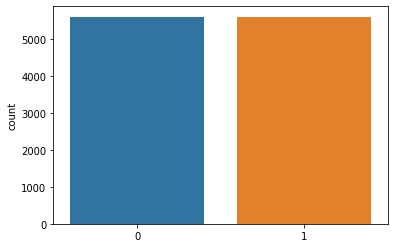

In [18]:
data_norm3 = data_norm2[data_norm2['ClassA']==1]

def func(data_norm3) :
    if data_norm3['Class'] == 17 : return 0
    else : return 1
data_norm3['ClassA'] = data_norm3.apply(func, axis = 1)

train, test = train_test_split(data_norm3, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values


In [19]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.7880333951762524
Random Forest 0.8257383966244725
XGBoost 0.8194594594594594
Iteration 1, loss = 0.63392140
Iteration 2, loss = 0.56659137
Iteration 3, loss = 0.53377140
Iteration 4, loss = 0.50909822
Iteration 5, loss = 0.49727234
Iteration 6, loss = 0.48240303
Iteration 7, loss = 0.47292975
Iteration 8, loss = 0.46398844
Iteration 9, loss = 0.46015522
Iteration 10, loss = 0.45033456
Iteration 11, loss = 0.44726039
Iteration 12, loss = 0.44582095
Iteration 13, loss = 0.43637170
Iteration 14, loss = 0.43458350
Iteration 15, loss = 0.42883232
Iteration 16, loss = 0.42367991
Iteration 17, loss = 0.41807067
Iteration 18, loss = 0.41572490
Iteration 19, loss = 0.41130451
Iteration 20, loss = 0.40459061
Iteration 21, loss = 0.40205723
Iteration 22, loss = 0.39964609
Iteration 23, loss = 0.39525172
Iteration 24, loss = 0.39040495
Iteration 25, loss = 0.38874162
Iteration 26, loss = 0.38145775
Iteration 27, loss = 0.37905252
Iteration 28, loss = 0.37259702
Iteration 29, loss = 0.3728713

In [20]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       960
           1       0.86      0.79      0.82      2396

    accuracy                           0.76      3356
   macro avg       0.71      0.73      0.72      3356
weighted avg       0.77      0.76      0.76      3356



C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


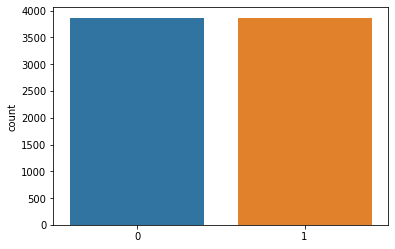

In [21]:
data_norm4 = data_norm3[data_norm3['ClassA']==1]

def func(data_norm4) :
    if data_norm4['Class'] == 16 : return 0
    else : return 1
data_norm4['ClassA'] = data_norm4.apply(func, axis = 1)

train, test = train_test_split(data_norm4, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values



In [22]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.8389391979301423
Random Forest 0.853022399509052
XGBoost 0.8560908254065663
Iteration 1, loss = 0.59020426
Iteration 2, loss = 0.49123073
Iteration 3, loss = 0.45326977
Iteration 4, loss = 0.43364467
Iteration 5, loss = 0.41617535
Iteration 6, loss = 0.40695767
Iteration 7, loss = 0.39648302
Iteration 8, loss = 0.39084225
Iteration 9, loss = 0.38216461
Iteration 10, loss = 0.37628693
Iteration 11, loss = 0.36853386
Iteration 12, loss = 0.36447161
Iteration 13, loss = 0.35763598
Iteration 14, loss = 0.35499325
Iteration 15, loss = 0.34777376
Iteration 16, loss = 0.34484005
Iteration 17, loss = 0.33791260
Iteration 18, loss = 0.33628851
Iteration 19, loss = 0.33786379
Iteration 20, loss = 0.32784023
Iteration 21, loss = 0.32201196
Iteration 22, loss = 0.31663414
Iteration 23, loss = 0.31318535
Iteration 24, loss = 0.31644630
Iteration 25, loss = 0.30735744
Iteration 26, loss = 0.30460591
Iteration 27, loss = 0.30359252
Iteration 28, loss = 0.29625960
Iteration 29, loss = 0.29189138

In [23]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       717
           1       0.89      0.82      0.85      1681

    accuracy                           0.80      2398
   macro avg       0.77      0.79      0.78      2398
weighted avg       0.82      0.80      0.81      2398



C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


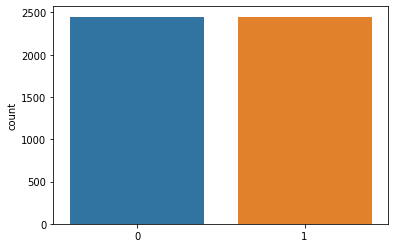

In [24]:
data_norm5 = data_norm4[data_norm4['ClassA']==1]

def func(data_norm5) :
    if data_norm5['Class'] == 198 : return 0
    else : return 1
data_norm5['ClassA'] = data_norm5.apply(func, axis = 1)

train, test = train_test_split(data_norm5, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values


In [25]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.9914448669201521
Random Forest 0.9904852521408183
XGBoost 0.9871489766777725
Iteration 1, loss = 0.41872152
Iteration 2, loss = 0.11277733
Iteration 3, loss = 0.06072171
Iteration 4, loss = 0.04957743
Iteration 5, loss = 0.04318295
Iteration 6, loss = 0.03847669
Iteration 7, loss = 0.03433239
Iteration 8, loss = 0.03056154
Iteration 9, loss = 0.02744047
Iteration 10, loss = 0.02514139
Iteration 11, loss = 0.02259971
Iteration 12, loss = 0.02091478
Iteration 13, loss = 0.01928702
Iteration 14, loss = 0.01745237
Iteration 15, loss = 0.01612645
Iteration 16, loss = 0.01502705
Iteration 17, loss = 0.01368633
Iteration 18, loss = 0.01325823
Iteration 19, loss = 0.01203753
Iteration 20, loss = 0.01136658
Iteration 21, loss = 0.01047558
Iteration 22, loss = 0.00982502
Iteration 23, loss = 0.00961621
Iteration 24, loss = 0.00869096
Iteration 25, loss = 0.00838651
Iteration 26, loss = 0.00804245
Iteration 27, loss = 0.00740305
Iteration 28, loss = 0.00723841
Iteration 29, loss = 0.0068435

In [26]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       614
           1       0.99      0.99      0.99      1051

    accuracy                           0.99      1665
   macro avg       0.99      0.99      0.99      1665
weighted avg       0.99      0.99      0.99      1665



C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


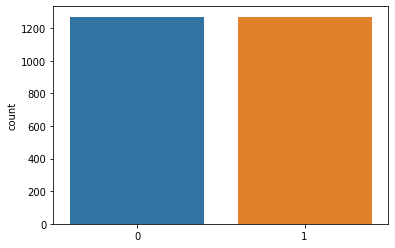

In [27]:
data_norm6 = data_norm5[data_norm5['ClassA']==1]

def func(data_norm6) :
    if data_norm6['Class'] == 76 : return 0
    else : return 1
data_norm6['ClassA'] = data_norm6.apply(func, axis = 1)

train, test = train_test_split(data_norm6, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values



In [28]:
# iterate over classifiers
y_pred_matrix = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sm, y_train_sm)
    #score = clf.score(X_test, y_test)
    #print(name, score)
    y_pred = clf.predict(x_test)
    y_pred[y_pred==-1] = 1
    y_pred_matrix.append(y_pred)
    f1_scr = f1_score(y_test, y_pred, average='binary')
    print(name, f1_scr)
    
y_pred_matrix = np.array(y_pred_matrix)
final_pred = mode(y_pred_matrix, axis=0)[0]
final_pred = final_pred.flatten()
final_score = f1_score(y_test, final_pred, average='binary')
print (final_score)

SVM 0.872444011684518
Random Forest 0.873917228103946
XGBoost 0.8798449612403101
Iteration 1, loss = 0.61254238
Iteration 2, loss = 0.44056331
Iteration 3, loss = 0.33970406
Iteration 4, loss = 0.30312806
Iteration 5, loss = 0.29178114
Iteration 6, loss = 0.28372674
Iteration 7, loss = 0.27592818
Iteration 8, loss = 0.27191170
Iteration 9, loss = 0.26945029
Iteration 10, loss = 0.26365020
Iteration 11, loss = 0.25900028
Iteration 12, loss = 0.25760508
Iteration 13, loss = 0.25342716
Iteration 14, loss = 0.25150529
Iteration 15, loss = 0.24812532
Iteration 16, loss = 0.24651808
Iteration 17, loss = 0.24901925
Iteration 18, loss = 0.24217686
Iteration 19, loss = 0.23902292
Iteration 20, loss = 0.23611091
Iteration 21, loss = 0.23471871
Iteration 22, loss = 0.23580076
Iteration 23, loss = 0.23089105
Iteration 24, loss = 0.22936625
Iteration 25, loss = 0.22795464
Iteration 26, loss = 0.22822380
Iteration 27, loss = 0.22244287
Iteration 28, loss = 0.21980949
Iteration 29, loss = 0.22103836


In [29]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       538
           1       0.87      0.89      0.88       513

    accuracy                           0.88      1051
   macro avg       0.88      0.88      0.88      1051
weighted avg       0.88      0.88      0.88      1051

